In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
my_df = pd.read_csv('/content/preprocessing_result.csv')
data_clean = my_df
data_clean.head(50)

In [ ]:
at1 = pd.read_csv('/content/preprocessing_result.csv')
at2 = pd.read_csv('/content/preprocessing_result.csv')
att1 = at1['text_steamindo']
att2 = at2['Label']

data_clean = pd.concat([att1,att2], axis=1)
data_clean.rename(columns={"text_steamindo": "Komentar"}, inplace=True)
data_clean.head()

,Komentar,Label
0,aplikasi bantu pesan gojek gocar pesan makan l...,Positif
1,suka gopay simple nyaman jaring gopay sambung ...,Negatif
2,aplikasi gojek susah tampil susah erti bikin o...,Negatif
3,aplikasi bantu pakai aplikasi apa,Positif
4,bayar gopay latter jatuh tempo gak telat pas b...,Negatif


In [ ]:
data_clean = data_clean.replace({'Negatif':0, 'Positif':1})
data_clean.head()

,Komentar,Label
0,aplikasi bantu pesan gojek gocar pesan makan l...,1
1,suka gopay simple nyaman jaring gopay sambung ...,0
2,aplikasi gojek susah tampil susah erti bikin o...,0
3,aplikasi bantu pakai aplikasi apa,1
4,bayar gopay latter jatuh tempo gak telat pas b...,0


In [ ]:
data_clean['Label'].value_counts()

0    667
1    220
Name: Label, dtype: int64

In [ ]:
data_clean.to_csv('data_clean.csv', index= False) #simpan hasil data_clean ke file csv

**Spliting Data**

memecah data test 20% dari keseluruhan data

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
x = data_clean['Komentar']
y = data_clean['Label']
x_train, x_test, y_train, y_test = train_test_split(data_clean['Komentar'], data_clean['Label'], test_size = 0.20, random_state = 0)

In [ ]:
#menggunakan counvectorizer untuk merubah text menjadi fitur numerik
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [ ]:
#melakukan oversampling menggunakan SMOTE pada data latih
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_vec, y_train)
y_train_resampled.value_counts()

0    522
1    522
Name: Label, dtype: int64

**Modeling**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:
y_pred = nb.predict(x_test_vec)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
#Evaluasi Model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negatif', 'Positif'])

print(f'confusion_matrix:\n {confusion_matrix(y_test, y_pred)}')

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)


confusion_matrix:
 [[126  19]
 [ 15  18]]
Akurasi Model Naive Bayes :  0.8089887640449438

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.89      0.87      0.88       145
     Positif       0.49      0.55      0.51        33

    accuracy                           0.81       178
   macro avg       0.69      0.71      0.70       178
weighted avg       0.82      0.81      0.81       178



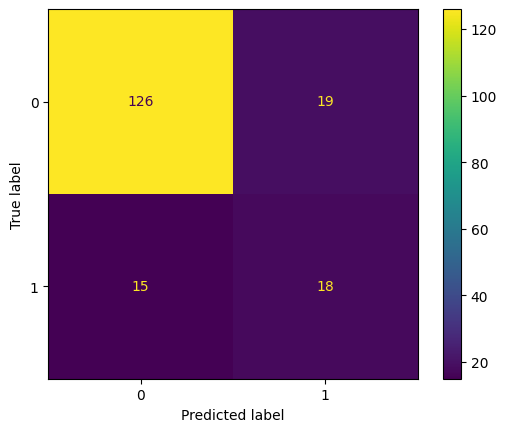

In [ ]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
disp.plot()
plt.show()

**Testing**

In [ ]:
new_text = input("\nMasukan teks baru: ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = nb.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentiment_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentiment_label = "Negatif"

print("Hasil Analisis Sentimen untuk Teks Baru :", sentiment_label)